In [1]:
pwd

'C:\\Users\\Sneha\\mywork\\tsa_cou_fol'

In [2]:
import pandas as pd
import numpy as np

In [3]:
import statsmodels.api as sm

In [4]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [5]:
#non stationary

df1 = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)

df1.index.freq = 'MS'

In [6]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [8]:
#stationary

df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)

#daily data
df2.index.freq = 'D'

In [9]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [10]:
df2.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq='D')

In [11]:
import warnings

warnings.filterwarnings('ignore')

# so that we dont get all that red text that are not errors, just warnings

## auto correlations

pretty statraight formard in statsmodels, directly use the func <b> acf()
    
    > acf is bound by -1 and 1 (both inclusive)

In [22]:
# building a basic dataframe to test things out

df = pd.DataFrame( {'a' : [13,5,11,12,9] } )

df

,a
0,13
1,5
2,11
3,12
4,9


In [23]:
# autocorrelation for 'df' in 1-Dimension

arr = acf(df['a'])

arr

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

## PACF 

1. yw = <b>Yule-Walker method for Partial AC calculation </b><br>
<br>
pass nlags here that is no. of lags to calculate pacf for. eg: =1 means calc lag-1 only, =2 means calc lag-1 & lag-2
<br>
* method='mle'  => use BIASED ACF COEFFICIENTS,<i> mle = 'Maximum Likelihood Estimation'</i><br>
* method= 'biased' => default <br> <br> <br>

2. ols = <b> Ordinary Least Squares Estimate for each lag to calc pacf </b>
<br>
pass the no. of lags in nlags
<br>

In [27]:
#method 1.A

pacf_yw(df['a'], nlags=4 ,method='mle')

# array of pacf values 

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [28]:
#method 1.B

pacf_yw(df['a'], nlags=4 , method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [30]:
#method 2

pacf_ols(df['a'], nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

WHY are there different ways of calculating pacf ?

> coz there are diff ways of calculating CORRELATION eg. Pearson-CorrelationCoeff & hence diff methods diff errors and thereby for pacf too 

<br>
<br>
For TSA, above 3 functions won't be called.<br>

>Instead, you'll be plotting DEFAULT ACF, PACF from Statsmodels

## Plotting ACF & PACF

In [31]:
from pandas.plotting import lag_plot

> lag_plot is useful for plotting a TS wrt a lagged-version of itself

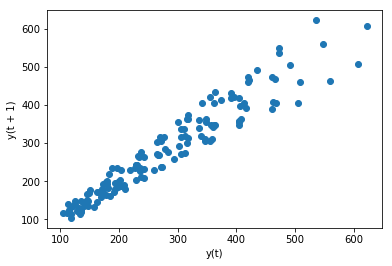

In [32]:
lag_plot(df1['Thousands of Passengers']);

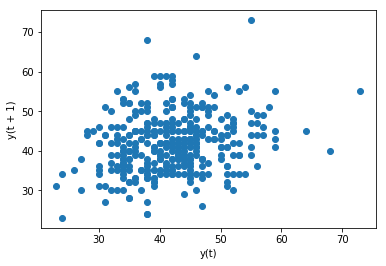

In [33]:
lag_plot(df2['Births']);

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

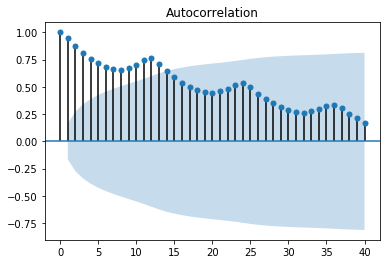

In [36]:
plot_acf(df1, lags=40);

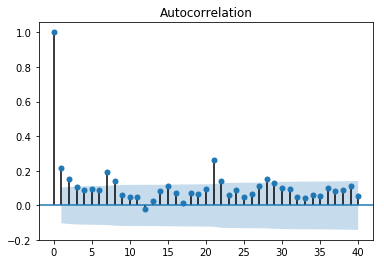

In [37]:
plot_acf(df2, lags=40);

# no seasonality

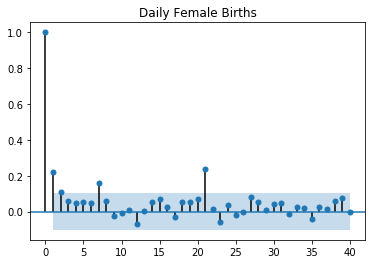

In [39]:
# pacf plots works best with stationary data

plot_pacf(df2, lags=40, title='Daily Female Births');

In [40]:
# later, read this graphs to decide order for the params of AR, MA parts of ARIMA model

In [41]:
# though its EASIER TO DO A GRID SEARCH

In [42]:
# but we'll see how to identify the no. of terms for AR & MA terms using these plots

your takeaway from here : the last two plotting functions only